# Más allá de la modelización con OLS

Objetivos: vamos a seguir un proceso estructurado de modelización gon GAM

Dataset: startups

1) Elección de coeficientes:

  * Elegimos coeficientes sin función de suavizado
  * Elegimos coeficientes con función de suavizado
  * Cuales quitamos

2) Ajuste del modelo

3) Comparativa con el modelo de regresión múltiple con las mismas variables
   * RMSE
   * R2
   * Evaluación de residuos

4) ¿Ha merecido la pena?

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pygam
print(pygam.__version__)

df = pd.read_csv('../data/50_Startups.csv')

0.10.1


In [42]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


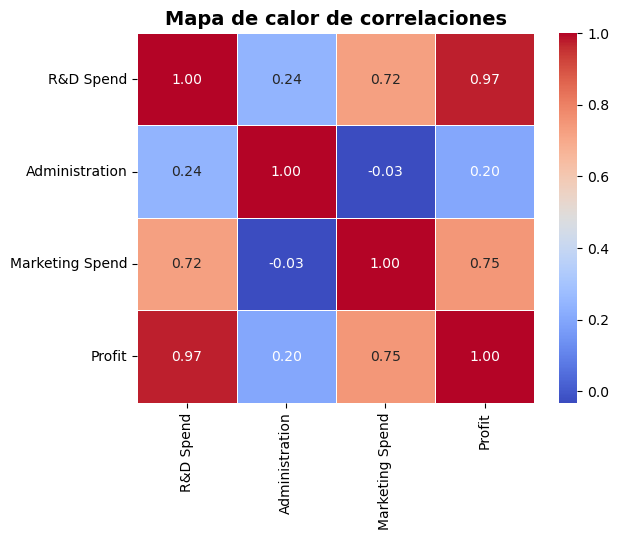

In [43]:
df_cor=df.corr
sns.heatmap(df_cor(numeric_only=True), 
            annot=True,        # muestra los valores numéricos
            cmap='coolwarm',   # paleta de colores (puedes cambiarla)
            fmt=".2f",         # formato de los números
            linewidths=0.5)    # líneas divisorias

plt.title("Mapa de calor de correlaciones", fontsize=14, fontweight='bold')
plt.show()

In [44]:
X=df[["R&D Spend","Marketing Spend"]].values
print(X.shape)
y=df["Profit"].values
print(y.shape)
print(type(X))
print(type(y))

(50, 2)
(50,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [46]:
X_train = X_train.astype(float)
y_train = y_train.astype(float)

In [47]:
from pygam import LinearGAM, s,l
gam = LinearGAM(s(0) + l(1))
gam.gridsearch(X_train, y_train)



  0% (0 of 11) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  9% (1 of 11) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:00
 63% (7 of 11) |###############          | Elapsed Time: 0:00:00 ETA:   0:00:00
100% (11 of 11) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, terms=s(0) + l(1) + intercept, 
   tol=0.0001, verbose=False)

In [48]:
#predecir
y_pred=gam.predict(X_test)

In [49]:
#Evaluar modelo 
from sklearn.metrics import r2_score, mean_absolute_error
R2=r2_score(y_pred, y_test)
MAE=mean_absolute_error(y_pred, y_test)
print("=="*60)
print("Evaluando el modelo de predicción Gam tomando ambas variables con suavizado")
print(f"GAM-R2 DE PRUEBA:{R2:.2f}")
print(f"GAM-MAE DE PRUEBA:{MAE:.2f}")


Evaluando el modelo de predicción Gam tomando ambas variables con suavizado
GAM-R2 DE PRUEBA:0.93
GAM-MAE DE PRUEBA:6971.33


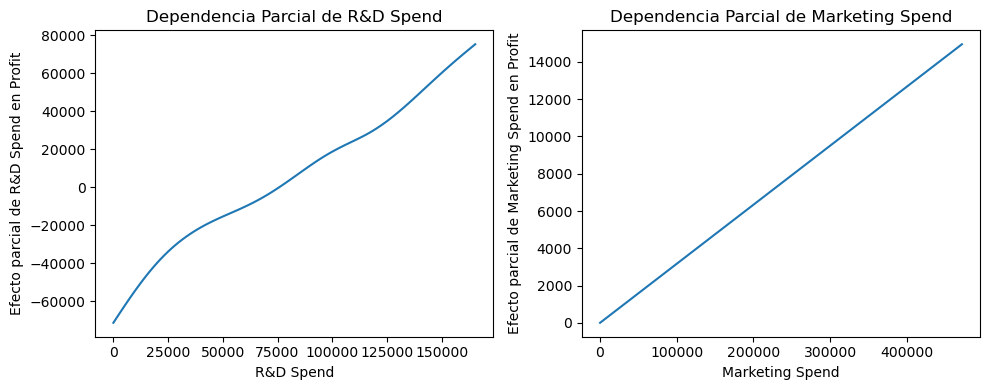

In [50]:

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

XX_0 = gam.generate_X_grid(term=0)
axes[0].plot(XX_0[:, 0], gam.partial_dependence(term=0, X=XX_0))
axes[0].set_xlabel("R&D Spend")
axes[0].set_ylabel('Efecto parcial de R&D Spend en Profit')
axes[0].set_title(f'Dependencia Parcial de R&D Spend')

XX_1 = gam.generate_X_grid(term=1)
axes[1].plot(XX_1[:, 1], gam.partial_dependence(term=1, X=XX_1))
axes[1].set_xlabel("Marketing Spend")
axes[1].set_ylabel('Efecto parcial de Marketing Spend en Profit')
axes[1].set_title(f'Dependencia Parcial de Marketing Spend')
plt.tight_layout()
plt.show()

In [51]:
##Procedemos a evaluar un modelo de regresion 100% de regresion lineal
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [52]:
X=df[["R&D Spend", "Marketing Spend"]]
y=df["Profit"]

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)


In [54]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
y_pred=model.predict(X_test)


In [56]:
from sklearn.metrics import r2_score, mean_absolute_error

r2_lineal=r2_score(y_pred, y_test)
MAE_lineal=mean_absolute_error(y_pred, y_test)
print("Error del modelo lineal")
print(f"R2 para modelo lineal {r2_lineal:.2f}")
print(f"MAE para modelo lineal {MAE_lineal:.2f}")

Error del modelo lineal
R2 para modelo lineal 0.95
MAE para modelo lineal 6449.24
